# Checking data of MTA turnstile and predict entries

Data is collected from 06/09/2018 to 06/16/2018, and available here:
http://web.mta.info/developers/turnstile.html

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import random
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(7)

In [2]:
data = pd.read_csv('data/turnstile_180616.txt')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196978 entries, 0 to 196977
Data columns (total 11 columns):
C/A                                                                     196978 non-null object
UNIT                                                                    196978 non-null object
SCP                                                                     196978 non-null object
STATION                                                                 196978 non-null object
LINENAME                                                                196978 non-null object
DIVISION                                                                196978 non-null object
DATE                                                                    196978 non-null object
TIME                                                                    196978 non-null object
DESC                                                                    196978 non-null object
ENTRIES                           

In [4]:
data.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,00:00:00,REGULAR,6649975,2254182
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,04:00:00,REGULAR,6650004,2254188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,08:00:00,REGULAR,6650022,2254209
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,12:00:00,REGULAR,6650118,2254289
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,16:00:00,REGULAR,6650332,2254345
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,20:00:00,REGULAR,6650579,2254378
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2018,00:00:00,REGULAR,6650723,2254407
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2018,04:00:00,REGULAR,6650747,2254415
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2018,08:00:00,REGULAR,6650770,2254427
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2018,12:00:00,REGULAR,6650827,2254487


In [5]:
data.describe()

,ENTRIES,EXITS
count,1.969780e+05,1.969780e+05
mean,4.040397e+07,3.309373e+07
std,2.092732e+08,1.923282e+08
min,0.000000e+00,0.000000e+00
25%,5.143135e+05,2.444542e+05
50%,2.534756e+06,1.448423e+06
75%,6.915278e+06,4.856676e+06
max,2.129887e+09,2.062611e+09


In [6]:
list(data)

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS                                                               ']

In [7]:
print('TIMEn = Represents the time (hh:mm:ss) for a scheduled audit event')
data[['TIME']].tail()

TIMEn = Represents the time (hh:mm:ss) for a scheduled audit event


,TIME
196973,05:00:00
196974,09:00:00
196975,13:00:00
196976,17:00:00
196977,21:00:00


In [8]:
print('DATEn = Represents the date (YYYY-MM-DD)')
data[['DATE']].tail()

DATEn = Represents the date (YYYY-MM-DD)


,DATE
196973,06/15/2018
196974,06/15/2018
196975,06/15/2018
196976,06/15/2018
196977,06/15/2018


In [9]:
print('C/A = Control Area (A002)')
data[['C/A']].head()

C/A = Control Area (A002)


,C/A
0,A002
1,A002
2,A002
3,A002
4,A002


In [10]:
print('UNIT = Remote Unit for a station (R051)')
data[['UNIT']].head()

UNIT = Remote Unit for a station (R051)


,UNIT
0,R051
1,R051
2,R051
3,R051
4,R051


In [11]:
print('SCP = Subunit Channel Position represents an specific address for a device (02-00-00)')
data[['SCP']].head()

SCP = Subunit Channel Position represents an specific address for a device (02-00-00)


,SCP
0,02-00-00
1,02-00-00
2,02-00-00
3,02-00-00
4,02-00-00


In [12]:
print('STATION  = Represents the station name the device is located at')
data[['STATION']].head()

STATION  = Represents the station name the device is located at


,STATION
0,59 ST
1,59 ST
2,59 ST
3,59 ST
4,59 ST


In [13]:
print('LINENAME = Represents all train lines that can be boarded at this station \
           Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.')
data[['LINENAME']].head()

LINENAME = Represents all train lines that can be boarded at this station            Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.


,LINENAME
0,NQR456W
1,NQR456W
2,NQR456W
3,NQR456W
4,NQR456W


In [14]:
print('DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND ')
data[['DIVISION']].head()

DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND 


,DIVISION
0,BMT
1,BMT
2,BMT
3,BMT
4,BMT


In [15]:
print('DESc = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours) \
           1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. \
           2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. ')
data[['DESC']].head()

DESc = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)            1. Audits may occur more that 4 hours due to planning, or troubleshooting activities.            2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 


,DESC
0,REGULAR
1,REGULAR
2,REGULAR
3,REGULAR
4,REGULAR


In [16]:
print('ENTRIES = The cumulative entry register value for a device')
data[['ENTRIES']].head()

ENTRIES = The cumulative entry register value for a device


,ENTRIES
0,6649975
1,6650004
2,6650022
3,6650118
4,6650332


In [17]:
data.columns.values

array(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE',
       'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               '], dtype=object)

In [18]:
print('EXITS = The cumulative exit register value for a device')
data = data.rename(columns = {'EXITS                                                               ':'EXITS'})
data[['EXITS']].head()

EXITS = The cumulative exit register value for a device


,EXITS
0,2254182
1,2254188
2,2254209
3,2254289
4,2254345


### Count Nans in each column

In [19]:
data.isnull().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

### There's fortunately no NaN values. What about empty values?

In [20]:
data.iloc[:, 1:].eq("").sum(axis=1).unique()

array([0])

### There's also no "blank" cells. 
## Now, let's check uniques in each column:

### Check for a weekdays of collecting data. Is data gathered during weekends?

In [21]:
import datetime as dt

In [22]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [23]:
data['DATE'].dt.dayofweek

0         5
1         5
2         5
3         5
4         5
5         5
6         6
7         6
8         6
9         6
10        6
11        6
12        0
13        0
14        0
15        0
16        0
17        0
18        1
19        1
20        1
21        1
22        1
23        1
24        2
25        2
26        2
27        2
28        2
29        2
         ..
196948    0
196949    0
196950    0
196951    0
196952    0
196953    0
196954    1
196955    1
196956    1
196957    1
196958    1
196959    1
196960    2
196961    2
196962    2
196963    2
196964    2
196965    2
196966    3
196967    3
196968    3
196969    3
196970    3
196971    3
196972    4
196973    4
196974    4
196975    4
196976    4
196977    4
Name: DATE, Length: 196978, dtype: int64

In [25]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data['WEEKDAY'] = data['DATE'].dt.dayofweek.map(dayOfWeek)

In [26]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,WEEKDAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-06-09,00:00:00,REGULAR,6649975,2254182,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-06-09,04:00:00,REGULAR,6650004,2254188,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-06-09,08:00:00,REGULAR,6650022,2254209,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-06-09,12:00:00,REGULAR,6650118,2254289,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-06-09,16:00:00,REGULAR,6650332,2254345,Saturday


In [28]:
data['WEEKDAY'].value_counts()

Friday       28570
Sunday       28095
Tuesday      28072
Monday       28068
Thursday     28061
Wednesday    28058
Saturday     28054
Name: WEEKDAY, dtype: int64

#### As seen above, data is collected regularly even during weekends

### Now it's time to check for Control Area information

In [29]:
len(data['C/A'].unique()), data['C/A'].unique()

(731, array(['A002', 'A006', 'A007', 'A010', 'A011', 'A013', 'A014', 'A015',
        'A016', 'A021', 'A022', 'A025', 'A027', 'A029', 'A030', 'A031',
        'A033', 'A034', 'A035', 'A037', 'A038', 'A039', 'A041', 'A042',
        'A043', 'A046', 'A047', 'A049', 'A050', 'A052', 'A053', 'A054',
        'A055', 'A058', 'A060', 'A061', 'A064', 'A066', 'A069', 'A071',
        'A077', 'A081', 'A082', 'A083', 'A084', 'A085', 'B004', 'B009',
        'B010', 'B012', 'B013', 'B014', 'B015', 'B016', 'B017', 'B018',
        'B019', 'B020', 'B021', 'B022', 'B023', 'B024', 'B024A', 'B025',
        'B026', 'B027', 'B028', 'B029', 'B031', 'B032', 'B034', 'C001',
        'C003', 'C004', 'C008', 'C009', 'C010', 'C011', 'C012', 'C014',
        'C015', 'C016', 'C017', 'C018', 'C019', 'C020', 'C021', 'C022',
        'C023', 'C024', 'C025', 'C026', 'C027', 'C028', 'D002', 'D004',
        'D005', 'D006', 'D008', 'D009', 'D011', 'D012', 'D015', 'D016',
        'E001', 'E003', 'E004', 'E005', 'E009', 'E011', 'E

### Checking for Remote Unit for station column

In [30]:
len(data['UNIT'].unique()), data['UNIT'].unique()

(463, array(['R051', 'R079', 'R080', 'R081', 'R032', 'R022', 'R023', 'R082',
        'R083', 'R170', 'R085', 'R086', 'R462', 'R463', 'R087', 'R088',
        'R227', 'R001', 'R142', 'R311', 'R118', 'R044', 'R028', 'R125',
        'R171', 'R411', 'R412', 'R196', 'R148', 'R098', 'R262', 'R184',
        'R149', 'R263', 'R228', 'R229', 'R211', 'R150', 'R230', 'R136',
        'R172', 'R264', 'R108', 'R089', 'R099', 'R057', 'R231', 'R258',
        'R246', 'R278', 'R455', 'R197', 'R232', 'R233', 'R212', 'R213',
        'R214', 'R215', 'R216', 'R390', 'R391', 'R398', 'R392', 'R393',
        'R394', 'R395', 'R396', 'R397', 'R368', 'R369', 'R234', 'R247',
        'R370', 'R371', 'R372', 'R373', 'R374', 'R399', 'R400', 'R151',
        'R312', 'R175', 'R163', 'R330', 'R248', 'R235', 'R268', 'R249',
        'R250', 'R265', 'R294', 'R279', 'R236', 'R137', 'R266', 'R295',
        'R313', 'R348', 'R349', 'R350', 'R375', 'R376', 'R152', 'R535',
        'R536', 'R460', 'R352', 'R353', 'R377', 'R378', 'R3

### Checking Subunit Channel Position values

In [31]:
len(data['SCP'].unique()), data['SCP'].unique()

(217, array(['02-00-00', '02-00-01', '02-03-00', '02-03-01', '02-03-02',
        '02-03-03', '02-03-04', '02-03-05', '02-03-06', '02-05-00',
        '02-05-01', '02-06-00', '00-00-00', '00-00-01', '00-00-02',
        '00-00-03', '00-00-04', '00-03-00', '00-03-01', '00-03-02',
        '01-05-00', '01-05-01', '01-06-00', '01-06-01', '01-06-02',
        '01-06-03', '00-00-05', '00-00-06', '00-00-07', '01-00-00',
        '01-00-01', '01-00-02', '01-00-03', '01-00-04', '01-00-05',
        '01-03-00', '01-03-01', '01-03-02', '02-00-02', '02-06-01',
        '03-00-00', '03-00-01', '03-00-02', '03-06-00', '03-06-01',
        '01-00-06', '01-00-07', '01-03-03', '02-00-03', '02-00-04',
        '02-00-05', '03-03-00', '03-03-01', '03-03-02', '03-06-02',
        '05-00-00', '05-00-01', '05-00-02', '05-00-03', '00-06-00',
        '00-03-03', '00-03-04', '00-06-01', '00-06-02', '00-05-00',
        '00-05-01', '00-05-02', '00-05-03', '00-06-03', '00-06-04',
        '00-06-05', '00-06-06', '00-06-07',

### Checking stations info

In [32]:
len(data['STATION'].unique()), data['STATION'].unique()

(375, array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
        '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
        'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
        'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
        'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
        'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
        'CORTELYOU RD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J', 'AVENUE M',
        'KINGS HWY', 'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY',
        'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL', 'JAY ST-METROTEC',
        'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST', '4AV-9 ST',
        'PROSPECT AV', '25 ST', '36 ST', '45 ST', '53 ST', 'BAY RIDGE AV',
        '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AV', 'FT HAMILTON PKY',
        'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY', '9 AV', '50 ST',
        '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST', 'CONEY

### Checking for linename and distinct unique linenames

In [33]:
len(data['LINENAME'].unique()), data['LINENAME'].unique()

(114, array(['NQR456W', 'NQRW', 'ACENQRS1237W', 'BDFMNQRW', 'NRW', 'LNQR456W',
        'JNQRZ6W', 'RNW', 'R1W', 'FJMZ', 'JZ', 'JZ456', 'ACJZ2345', 'BQ',
        'S', 'S2345', 'BQS', 'Q', 'R2345', 'R', 'BDNQR', 'BDNQR2345',
        'DFGMNR', 'DNR', 'N', 'ND', 'D', 'DFNQ', 'FQ', 'ACEL', 'FLM123',
        'L', 'LG', 'LM', 'A', 'E', 'JMZ', 'JM', 'J', 'M', 'AC1', 'C',
        'ABCD', 'BC', 'ACBD', 'ABCD1', 'CE', 'ACENGRS1237W', 'ACE',
        'ABCDEFM', 'ACE23', '2345ACJZ', 'AC', 'ACF', 'ACG', 'ACS', 'ACJLZ',
        'AS', 'BD', 'BD4', 'BDE', 'EM', 'EM6', 'EMG', 'EMR', 'MR', 'EFMR7',
        'EFMR', 'EF', 'F', 'G', 'GL', 'BDFM', 'BDFM7', 'FM', 'BDFQ6', 'FG',
        'EJZ', '6', '1', '1RW', '23', '23ACE', '123', '123FLM', '123ACE',
        '1237ACENQRSW', '1237ACENQRS', '1ABCD', '1AC', '45', '456JZ', '6DF',
        '456LNQRW', '4567S', '456NQRW', '456', '245', '4BD', '4', '3', '25',
        '2', '7BDFM', '7', '7NQW', 'NQW', '7EFMR', '2345R', '2345',
        '2345BDNQR', '2345S', '34', '5'], 

In [34]:
lineNames = data.LINENAME

In [35]:
lineName_list = set()
for i in range(len(lineNames)):
    lineName_list.add(lineNames[i])

In [36]:
lineName_list

{'1',
 '123',
 '1237ACENQRS',
 '1237ACENQRSW',
 '123ACE',
 '123FLM',
 '1ABCD',
 '1AC',
 '1RW',
 '2',
 '23',
 '2345',
 '2345ACJZ',
 '2345BDNQR',
 '2345R',
 '2345S',
 '23ACE',
 '245',
 '25',
 '3',
 '34',
 '4',
 '45',
 '456',
 '4567S',
 '456JZ',
 '456LNQRW',
 '456NQRW',
 '4BD',
 '5',
 '6',
 '6DF',
 '7',
 '7BDFM',
 '7EFMR',
 '7NQW',
 'A',
 'ABCD',
 'ABCD1',
 'ABCDEFM',
 'AC',
 'AC1',
 'ACBD',
 'ACE',
 'ACE23',
 'ACEL',
 'ACENGRS1237W',
 'ACENQRS1237W',
 'ACF',
 'ACG',
 'ACJLZ',
 'ACJZ2345',
 'ACS',
 'AS',
 'BC',
 'BD',
 'BD4',
 'BDE',
 'BDFM',
 'BDFM7',
 'BDFMNQRW',
 'BDFQ6',
 'BDNQR',
 'BDNQR2345',
 'BQ',
 'BQS',
 'C',
 'CE',
 'D',
 'DFGMNR',
 'DFNQ',
 'DNR',
 'E',
 'EF',
 'EFMR',
 'EFMR7',
 'EJZ',
 'EM',
 'EM6',
 'EMG',
 'EMR',
 'F',
 'FG',
 'FJMZ',
 'FLM123',
 'FM',
 'FQ',
 'G',
 'GL',
 'J',
 'JM',
 'JMZ',
 'JNQRZ6W',
 'JZ',
 'JZ456',
 'L',
 'LG',
 'LM',
 'LNQR456W',
 'M',
 'MR',
 'N',
 'ND',
 'NQR456W',
 'NQRW',
 'NQW',
 'NRW',
 'Q',
 'R',
 'R1W',
 'R2345',
 'RNW',
 'S',
 'S2345'}

In [37]:
lineName_list = list(lineName_list)
lines = set([item for sublist in lineName_list for item in sublist])

In [38]:
lines

{'1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'J',
 'L',
 'M',
 'N',
 'Q',
 'R',
 'S',
 'W',
 'Z'}

#### There're 23 lines in subway, connecting 114 stations

### Check divisions

In [39]:
len(data['DIVISION'].unique()), data['DIVISION'].unique()

(6, array(['BMT', 'IND', 'PTH', 'IRT', 'SRT', 'RIT'], dtype=object))

### Check for audits

In [40]:
len(data['DESC'].unique()), data['DESC'].unique()

(2, array(['REGULAR', 'RECOVR AUD'], dtype=object))

#### There are only two types od audits: 
* REGULAR - every 4 hours or more
* RECOVR AUD - for missed audits, recovery

### Check for entries to subway

In [41]:
print('Uniques:', len(data['ENTRIES'].unique()), '\nMin:', data['ENTRIES'].min(), 'Mean', data['ENTRIES'].mean(), 'Max:', data['ENTRIES'].max())

Uniques: 166645 
Min: 0 Mean 40403965.219202146 Max: 2129886754


### Check for exits from subway

In [42]:
print('Uniques:', len(data['EXITS'].unique()), '\nMin:', data['EXITS'].min(), 'Mean', data['EXITS'].mean(), 'Max:', data['EXITS'].max())

Uniques: 165654 
Min: 0 Mean 33093731.799206004 Max: 2062611370


#### Let's the ML begin

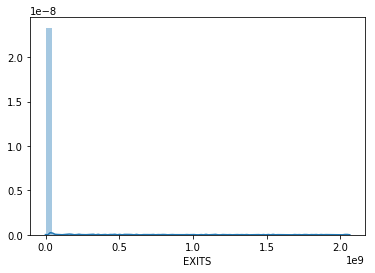

In [43]:
sns.distplot(data['EXITS'])

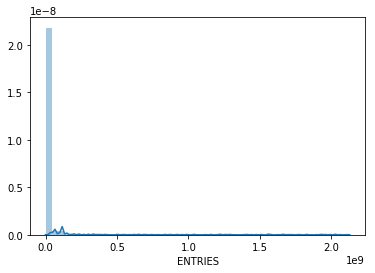

In [44]:
sns.distplot(data['ENTRIES'])

In [45]:
print("Skewness: %f" % data['EXITS'].skew())
print("Kurtosis: %f" % data['EXITS'].kurt())

Skewness: 7.578663
Kurtosis: 61.140383


In [46]:
print("Skewness: %f" % data['ENTRIES'].skew())
print("Kurtosis: %f" % data['ENTRIES'].kurt())

Skewness: 7.092635
Kurtosis: 52.811235


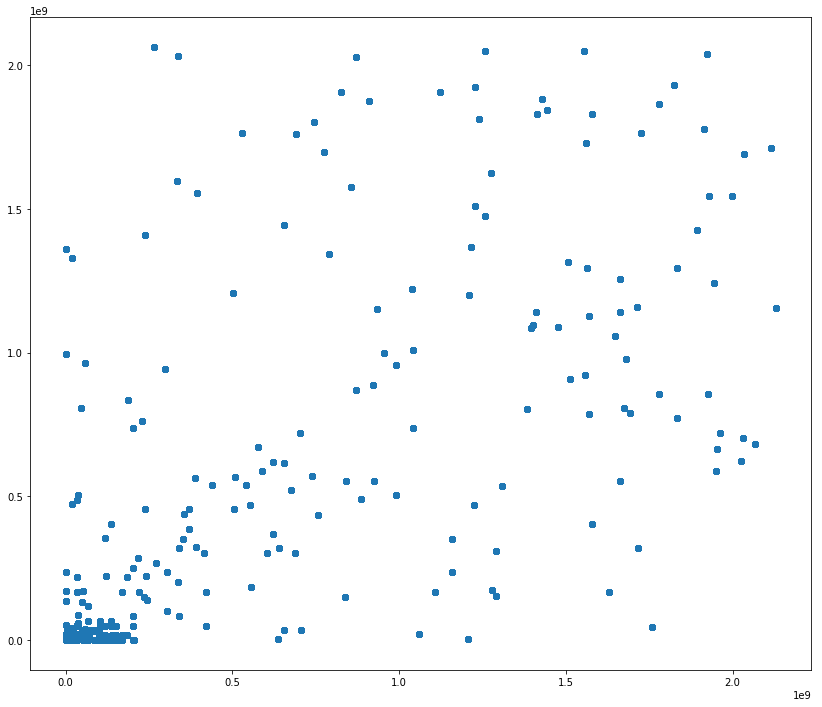

In [47]:
plt.figure(figsize=(14, 12))
plt.scatter(x=data['ENTRIES'], y=data['EXITS'])

Well, that's not best actually, lets improve it

In [50]:
data.EXITS.describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

count    1.969780e+05
mean     3.309373e+07
std      1.923282e+08
min      0.000000e+00
1%       0.000000e+00
2%       0.000000e+00
3%       0.000000e+00
4%       9.000000e+00
5%       1.230000e+02
10%      6.116800e+03
25%      2.444542e+05
50%      1.448423e+06
75%      4.856676e+06
90%      1.130450e+07
95%      1.987511e+07
96%      3.392218e+07
97%      1.853902e+08
98%      5.660316e+08
99%      1.206393e+09
max      2.062611e+09
Name: EXITS, dtype: float64

In [59]:
data.ENTRIES.describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

count    1.969780e+05
mean     4.040397e+07
std      2.092732e+08
min      0.000000e+00
1%       0.000000e+00
2%       1.000000e+00
3%       7.000000e+00
4%       1.490000e+02
5%       8.660000e+02
10%      3.251630e+04
25%      5.143135e+05
50%      2.534756e+06
75%      6.915278e+06
90%      1.577533e+07
95%      1.174405e+08
96%      1.185149e+08
97%      2.185741e+08
98%      6.906886e+08
99%      1.409658e+09
max      2.129887e+09
Name: ENTRIES, dtype: float64

In [76]:
data_test = data[(data.EXITS < np.percentile(data.EXITS,97)) & (data.EXITS > np.percentile(data.EXITS,4))]

In [77]:
data_test = data_test[(data_test.ENTRIES < np.percentile(data_test.ENTRIES,97)) & (data_test.ENTRIES > np.percentile(data.ENTRIES,3))]

In [78]:
data_test.EXITS.describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

count    1.718500e+05
mean     3.610382e+06
std      7.175009e+06
min      1.000000e+01
1%       3.110000e+02
2%       1.562000e+03
3%       4.826940e+03
4%       1.107700e+04
5%       1.645000e+04
10%      5.882700e+04
25%      3.814868e+05
50%      1.605006e+06
75%      4.618550e+06
90%      9.164137e+06
95%      1.308791e+07
96%      1.452898e+07
97%      1.614317e+07
98%      1.749022e+07
99%      2.373154e+07
max      1.695777e+08
Name: EXITS, dtype: float64

In [79]:
data_test.ENTRIES.describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

count    1.718500e+05
mean     4.769228e+06
std      7.595466e+06
min      8.000000e+00
1%       9.880000e+02
2%       6.363000e+03
3%       1.748764e+04
4%       2.708564e+04
5%       3.758790e+04
10%      1.303954e+05
25%      6.495190e+05
50%      2.551094e+06
75%      6.101459e+06
90%      1.083293e+07
95%      1.469440e+07
96%      1.625476e+07
97%      1.820070e+07
98%      2.169496e+07
99%      5.033193e+07
max      6.765020e+07
Name: ENTRIES, dtype: float64

In [95]:
data_test = data_test[data_test.ENTRIES < 2e7]

In [96]:
data_test = data_test[data_test.EXITS < 2e7]

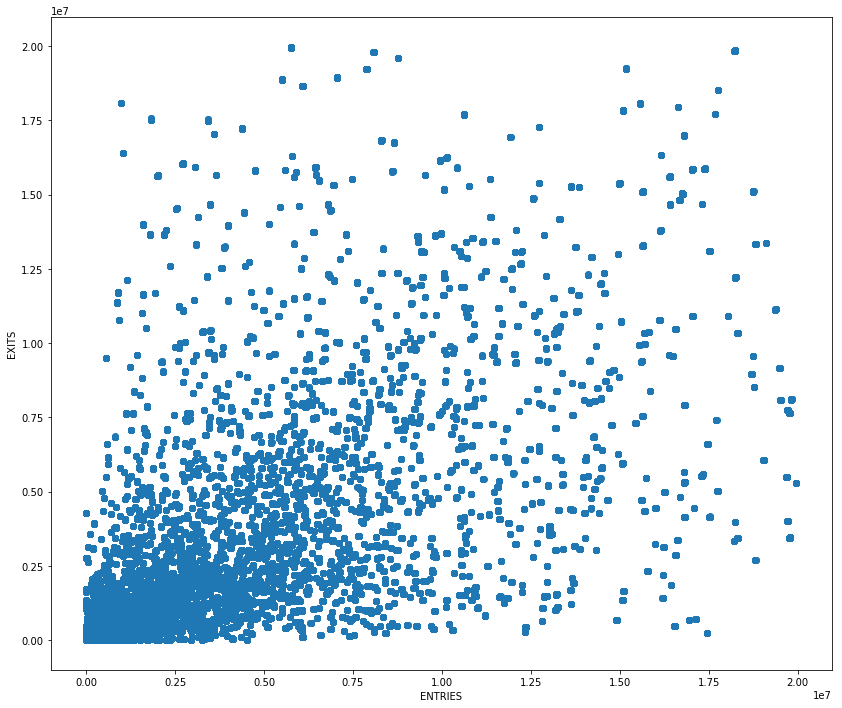

In [97]:
plt.figure(figsize=(14, 12))
plt.scatter(x=data_test['ENTRIES'], y=data_test['EXITS'] )
plt.xlabel('ENTRIES'), plt.ylabel('EXITS')
plt.show()

In [98]:
data = data_test

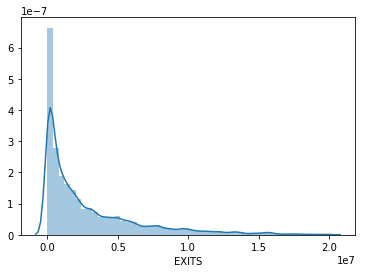

In [103]:
sns.distplot(data['EXITS'])

Surely, it looks way better ;)

In [99]:
print("Skewness: %f" % data['EXITS'].skew())
print("Kurtosis: %f" % data['EXITS'].kurt())

Skewness: 1.811903
Kurtosis: 3.267724


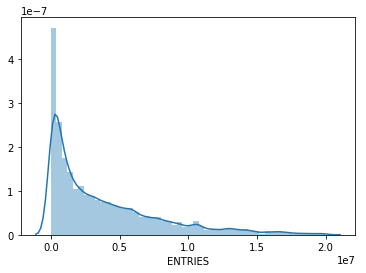

In [104]:
sns.distplot(data['ENTRIES'])

In [100]:
print("Skewness: %f" % data['ENTRIES'].skew())
print("Kurtosis: %f" % data['ENTRIES'].kurt())

Skewness: 1.422966
Kurtosis: 1.664461


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165932 entries, 0 to 196977
Data columns (total 12 columns):
C/A         165932 non-null object
UNIT        165932 non-null object
SCP         165932 non-null object
STATION     165932 non-null object
LINENAME    165932 non-null object
DIVISION    165932 non-null object
DATE        165932 non-null datetime64[ns]
TIME        165932 non-null object
DESC        165932 non-null object
ENTRIES     165932 non-null int64
EXITS       165932 non-null int64
WEEKDAY     165932 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 21.5+ MB


In [102]:
165932/196977

0.8423927666681897

Lost 15% of data, it's off course very much info but the data is few times easier to work with

Create test data for correlation map

In [105]:
def count_lines(lines):
    lines = list(lines)
    line_list = set()
    for i in range(len(lines)):
        line_list.add(lines[i])
    line_list = list(line_list)
    return set([item for sublist in line_list for item in sublist])

In [123]:
encode = data.copy()
for i in lines:
    encode['LINENAME' +  str(i)] = encode['LINENAME'].str.contains(str(i))

In [124]:
encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165932 entries, 0 to 196977
Data columns (total 35 columns):
C/A          165932 non-null object
UNIT         165932 non-null object
SCP          165932 non-null object
STATION      165932 non-null object
LINENAME     165932 non-null object
DIVISION     165932 non-null object
DATE         165932 non-null datetime64[ns]
TIME         165932 non-null object
DESC         165932 non-null object
ENTRIES      165932 non-null int64
EXITS        165932 non-null int64
WEEKDAY      165932 non-null object
LINENAME4    165932 non-null bool
LINENAMEZ    165932 non-null bool
LINENAME5    165932 non-null bool
LINENAME1    165932 non-null bool
LINENAMER    165932 non-null bool
LINENAMES    165932 non-null bool
LINENAMEM    165932 non-null bool
LINENAMEN    165932 non-null bool
LINENAMEC    165932 non-null bool
LINENAME3    165932 non-null bool
LINENAMED    165932 non-null bool
LINENAMEL    165932 non-null bool
LINENAME2    165932 non-null bool
LINENAME6

In [125]:
from sklearn.preprocessing import LabelEncoder
cols = ('C/A', 'UNIT', 'SCP', 'DIVISION', 'DESC', 'STATION')

for c in cols:
    label = LabelEncoder()
    label.fit(list(encode[c].values))
    encode[c] = label.transform(list(encode[c].values))

In [126]:
encode['LINE_NUM'] = encode.LINENAME.str.len()

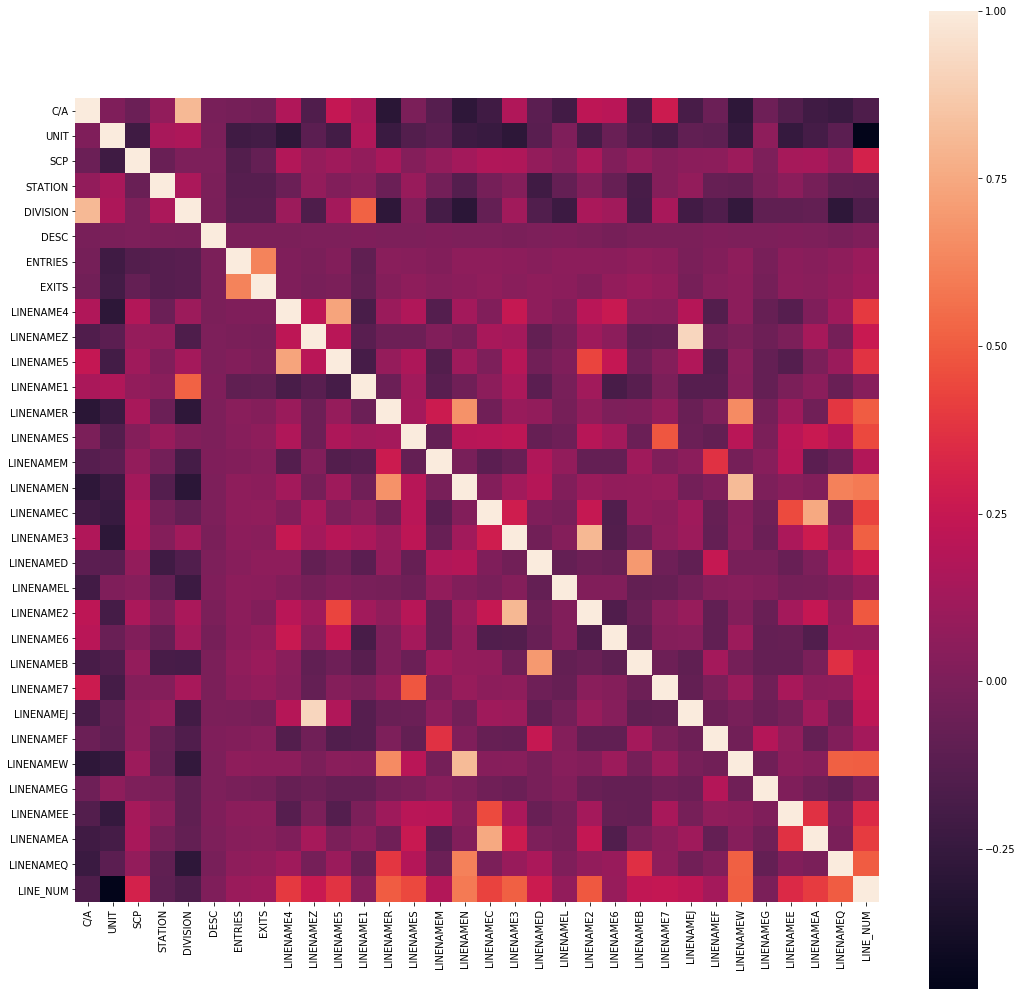

In [127]:
corr_matrix = encode.corr()
fun, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr_matrix, vmax=1, square=True)

In [128]:
correlations = encode.corr()['ENTRIES'].sort_values()

In [129]:
correlations[::-1]

ENTRIES      1.000000
EXITS        0.621086
LINE_NUM     0.101827
LINENAMEB    0.065566
LINENAMEC    0.064328
LINENAMEW    0.063050
LINENAMEN    0.062374
LINENAMEQ    0.061841
LINENAME3    0.053934
LINENAMEL    0.053910
LINENAME7    0.053888
LINENAME2    0.053686
LINENAME6    0.052449
LINENAMEE    0.050522
LINENAMER    0.042394
LINENAMED    0.041808
LINENAMES    0.040467
LINENAMEA    0.039594
LINENAMEM    0.023496
LINENAMEF    0.022465
LINENAME5    0.020136
LINENAME4    0.011640
DESC        -0.002404
LINENAMEJ   -0.005388
LINENAMEZ   -0.007394
LINENAMEG   -0.012273
C/A         -0.024403
LINENAME1   -0.095062
DIVISION    -0.122795
STATION     -0.134136
SCP         -0.145874
UNIT        -0.209457
Name: ENTRIES, dtype: float64

In [130]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [158]:
X = encode[['EXITS', 'LINE_NUM', 'LINENAMEB', 'LINENAMEC', 'LINENAMEW', 'LINENAMEN', 'LINENAMEQ', 'STATION']]
Y = encode[['ENTRIES']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [179]:
model_xgb = xgb.XGBRegressor(n_estimators=250, 
                             learning_rate=0.08, 
                             gamma=0, 
                             subsample=0.75,
                             colsample_bytree=0.8,
                             max_depth=12)

In [180]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=12, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [181]:
preds = model_xgb.predict(X_test)
print(explained_variance_score(y_test, preds))
print(r2_score(y_test, preds))

0.985086314552
0.985085404763


In [182]:
axis_x = [x for x in range(100)]

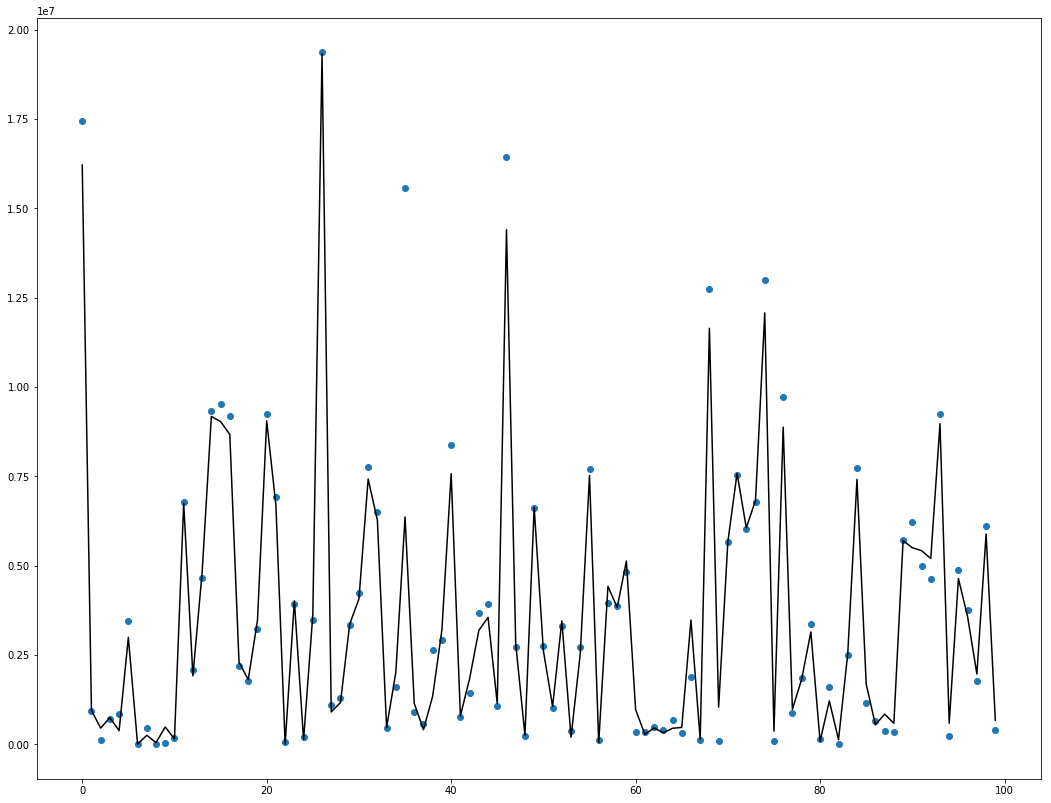

In [183]:
plt.figure(figsize=(18, 14))
plt.plot(axis_x, y_test[:100], 'o')

plt.plot(axis_x, preds[:100], '-k')

In [184]:
from sklearn.ensemble import RandomForestRegressor

In [197]:
rand = RandomForestRegressor(n_estimators=250,
                             max_depth=16,
                             random_state=7,
                             n_jobs=8,
                             verbose=1)

In [198]:
rand.fit(X_train, y_train)

/Users/oziomek/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   12.2s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:   16.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=8,
           oob_score=False, random_state=7, verbose=1, warm_start=False)

In [199]:
rand.score(X_test, y_test)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.4s finished


0.93042992999860985

In [200]:
pred_rand = rand.predict(X_test)
print(explained_variance_score(y_test, pred_rand))

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s


0.93044662312


[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.3s finished


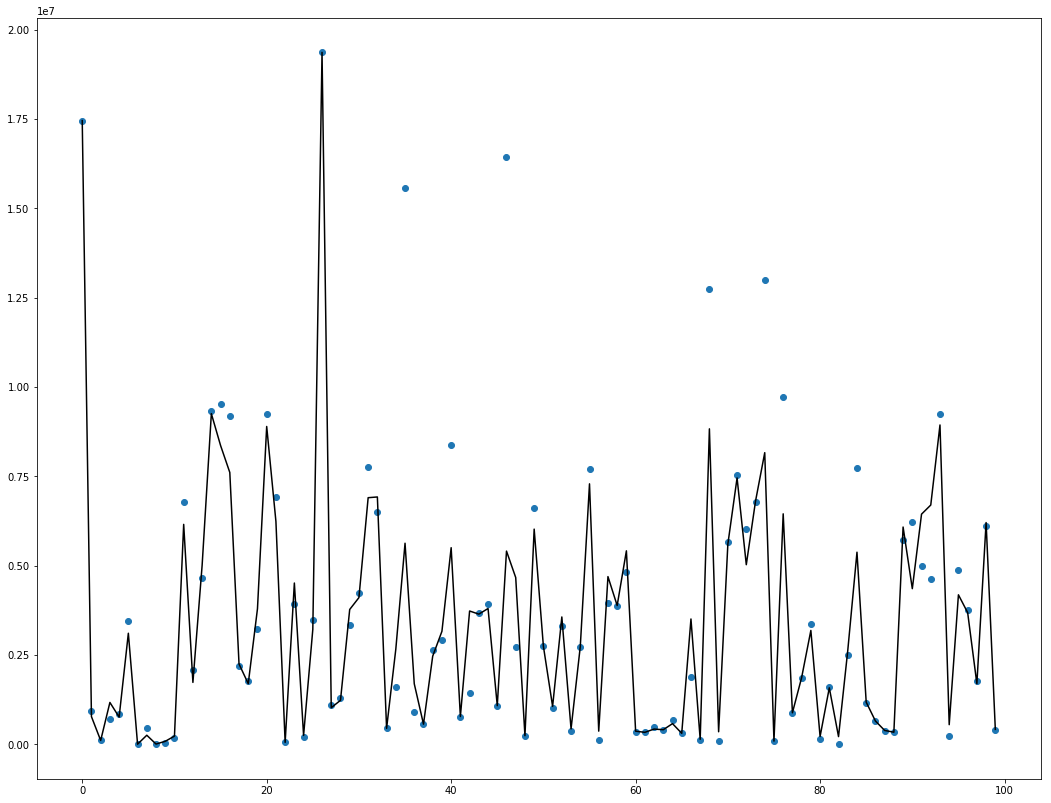

In [201]:
plt.figure(figsize=(18, 14))
plt.plot(axis_x, y_test[:100], 'o')

plt.plot(axis_x, pred_rand[:100], '-k')

In [202]:
from sklearn.ensemble import BaggingRegressor

In [205]:
rand_small = RandomForestRegressor(n_estimators=120,
                             max_depth=12,
                             random_state=7,
                             n_jobs=8,
                             verbose=1)

In [206]:
bagging = BaggingRegressor(base_estimator=rand_small, 
                           n_estimators=8, 
                           n_jobs=8,
                           random_state=9)

In [207]:
bagging.fit(X_train, y_train)

/Users/oziomek/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   12.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   12.8s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   13.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   13.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   13.1s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:   39.3s finished
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:   39.5s finished
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:   39.4s finished
[Parallel(n_jobs=8)]: Done 

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=8,
           oob_score=False, random_state=7, verbose=1, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=8, n_jobs=8, oob_score=False,
         random_state=9, verbose=0, warm_start=False)

In [208]:
bagging.score(X_test, y_test)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: 

0.81966831806098062

In [209]:
pred_bag = bagging.predict(X_test)
print(explained_variance_score(y_test, pred_bag))

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: 

0.819725459619


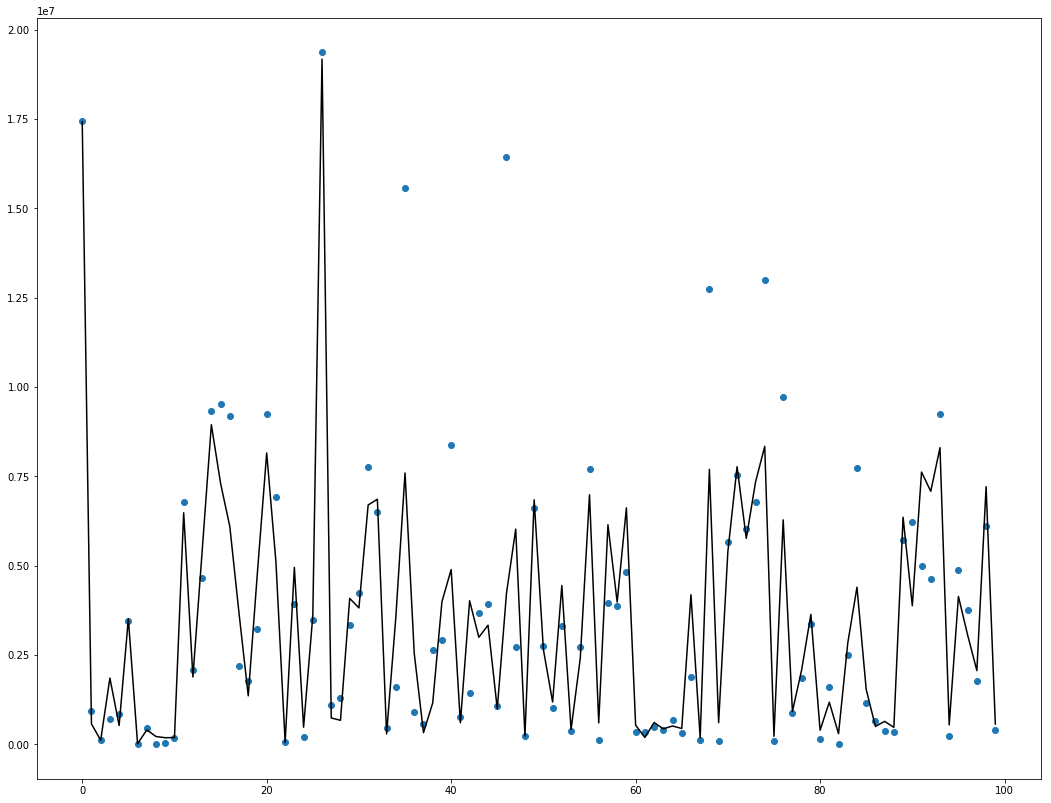

In [210]:
plt.figure(figsize=(18, 14))
plt.plot(axis_x, y_test[:100], 'o')

plt.plot(axis_x, pred_bag[:100], '-k')